In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_path_csv = "data/mq_variants_intensity.csv"

mq_variants_df = pd.read_csv(data_path_csv, index_col=[0, 1], low_memory=False)

In [3]:
mq_variants_df.head()

,,Variant,Variant ID,Unmod variant,Total,Total- Unmodified sequence,Variants- Unmodified sequence,Proteins,Mass,Charge,Num Mods,...,_dyn_#Baricitinib 300nM.Tech replicate 1 of 1,_dyn_#Baricitinib 300nM.Tech replicate 1 of 1_unmod,_dyn_#Baricitinib 30nM.Tech replicate 1 of 1,_dyn_#Baricitinib 30nM.Tech replicate 1 of 1_unmod,_dyn_#Baricitinib 3nM.Tech replicate 1 of 1,_dyn_#Baricitinib 3nM.Tech replicate 1 of 1_unmod,_dyn_#Baricitinib DMSO.Tech replicate 1 of 1,_dyn_#Baricitinib DMSO.Tech replicate 1 of 1_unmod,_dyn_#Baricitinib PDPD.Tech replicate 1 of 1,_dyn_#Baricitinib PDPD.Tech replicate 1 of 1_unmod
rowid,ccms_row_id,,,,,,,,,,,,,,,,,,,,,
1,1,.IITHPNFNGNTLDNDIM+15.995LIK.,37658,.IITHPNFNGNTLDNDIMLIK.,11683,20735,81,TRYP_PIG,2299.2,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,.VADPDHDHTGFLTEYVATR.,93378,.VADPDHDHTGFLTEYVATR.,11372,15019,62,sp|P28482-2|MK01_HUMAN;sp|P28482|MK01_HUMAN,2144.0,2,0,...,"182,810,000","182,810,000","296,340,000","296,340,000","272,890,000","272,890,000","254,860,000","254,860,000","70,792,000","70,792,000"
3,3,.LGEHNIDVLEGNEQFINAAK.,50733,.LGEHNIDVLEGNEQFINAAK.,8878,23098,134,TRYP_PIG,2211.1,2,0,...,"152,910,000","152,910,000","313,690,000","313,690,000","187,600,000","187,600,000","313,290,000","313,290,000","204,790,000","204,790,000"
4,4,.FRHENIIGINDIIR.,25741,.FRHENIIGINDIIR.,8720,12619,33,sp|P28482-2|MK01_HUMAN;sp|P28482|MK01_HUMAN,1709.9,2,0,...,"115,160,000","115,160,000","223,460,000","223,460,000","182,890,000","182,890,000","236,530,000","236,530,000","97,725,000","97,725,000"
5,5,.ESESTAGSFSLSVR.,21292,.ESESTAGSFSLSVR.,7995,8328,7,sp|P06239-2|LCK_HUMAN;sp|P06239-3|LCK_HUMAN;sp...,1456.7,2,0,...,"19,220,000","19,220,000","11,216,000","11,216,000","12,721,000","12,721,000","12,835,000","12,835,000","8,137,600","8,137,600"


In [4]:
# Define a function to convert columns with comma-separated numbers to numeric
def convert_comma_separated_to_numeric(df: pd.DataFrame):
    """
    Convert columns with comma-separated numbers to numeric type.
    """
    # Find columns that might contain string representations of numbers
    string_cols = df.select_dtypes(include=["object"]).columns

    # Track conversion statistics
    converted = 0
    failed = 0

    for col in string_cols:
        # Skip columns that are clearly not numeric intensity values
        if not col.startswith("_dyn_"):
            continue

        try:
            # First, try direct conversion (handles NaN and already numeric values)
            temp_series = df[col].str.replace(",", "", regex=False)
            # Convert to numeric, forcing errors to NaN
            temp_series = pd.to_numeric(temp_series, errors="coerce")

            # If there are non-null values, replace the column
            if not temp_series.isna().all():
                df[col] = temp_series
                converted += 1

        except Exception as e:
            print(f"Could not convert column: {col}, Error: {str(e)}")
            failed += 1

    print(
        f"Converted {converted} columns to numeric. Failed to convert {failed} columns."
    )
    return df


# Process the dataset
mq_variants_df = convert_comma_separated_to_numeric(mq_variants_df)

# Display info to verify conversion
print("\nDataset summary after conversion:")
print(mq_variants_df.dtypes.value_counts())

Converted 1000 columns to numeric. Failed to convert 0 columns.

Dataset summary after conversion:
float64    1008
object       14
int64         8
bool          1
Name: count, dtype: int64


MQ Variants Dataset Shape: (83706, 1031)

Missing values in MQ Variants DataFrame:
Total missing values: 77058168
Percentage of missing values: 89.29%

Sample of key columns from variants dataset:
                                         Variant  Variant ID  \
rowid ccms_row_id                                              
1     1            .IITHPNFNGNTLDNDIM+15.995LIK.       37658   
2     2                    .VADPDHDHTGFLTEYVATR.       93378   
3     3                   .LGEHNIDVLEGNEQFINAAK.       50733   
4     4                         .FRHENIIGINDIIR.       25741   
5     5                         .ESESTAGSFSLSVR.       21292   

                                                            Proteins    Mass  \
rowid ccms_row_id                                                              
1     1                                                     TRYP_PIG  2299.2   
2     2                  sp|P28482-2|MK01_HUMAN;sp|P28482|MK01_HUMAN  2144.0   
3     3                           

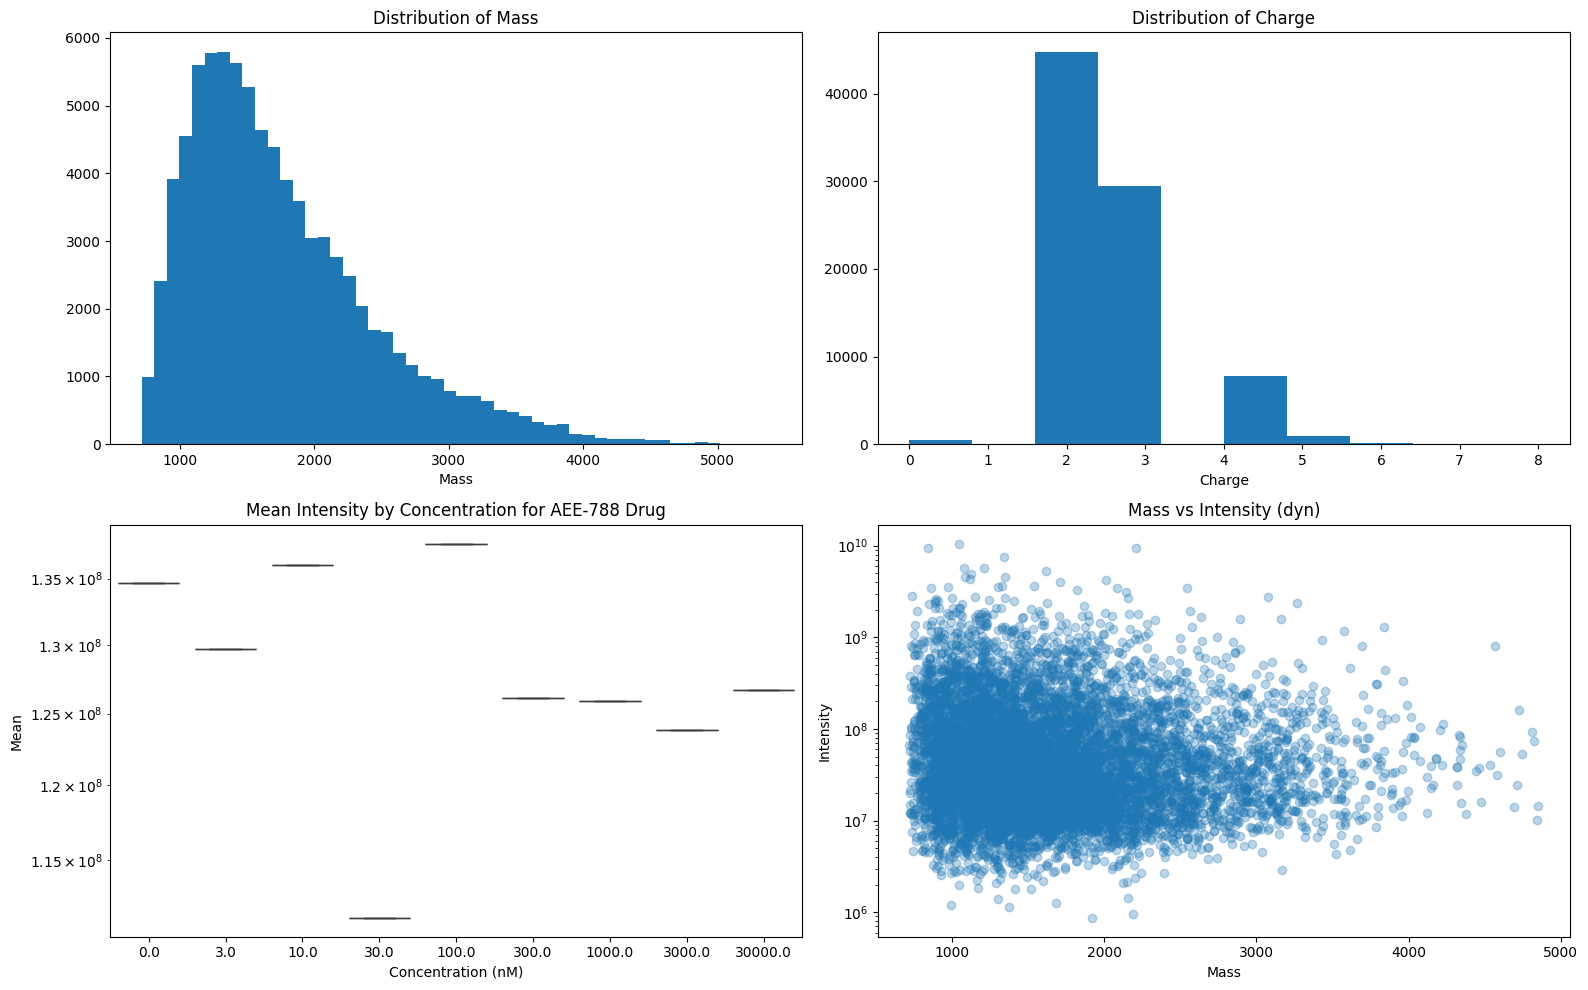


Top 10 modifications:
All Mods
,16,     9938
,1,      5594
,42,     3612
,-4,      812
,32,      797
,43,      762
,15,      663
,4,       549
,-17,     505
,41,      383
Name: count, dtype: int64


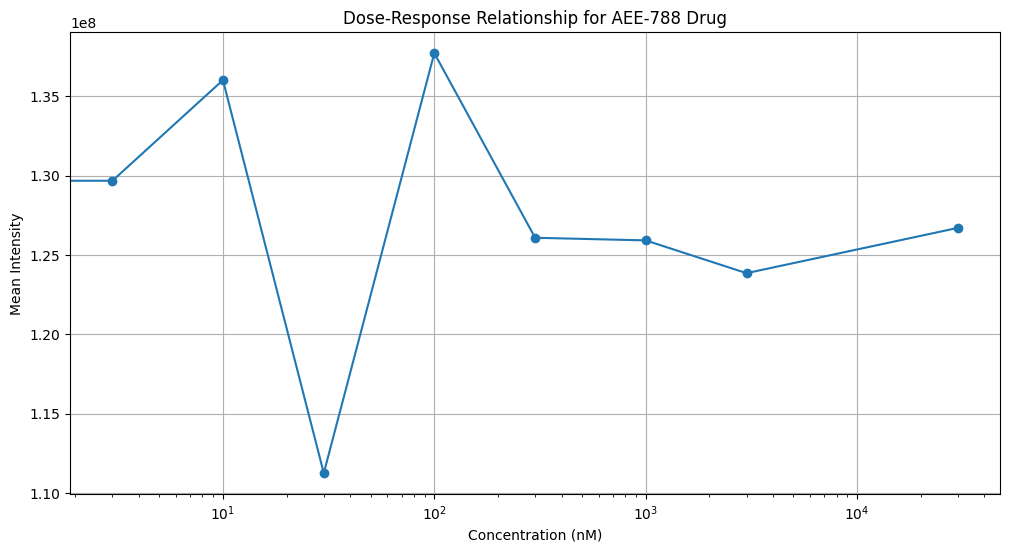

In [5]:
# Exploratory Analysis of MQ Variants Dataset

# 1. Basic information about the dataframes
print("MQ Variants Dataset Shape:", mq_variants_df.shape)

# 2. Check for missing values
print("\nMissing values in MQ Variants DataFrame:")
missing_values = mq_variants_df.isnull().sum().sum()
print(f"Total missing values: {missing_values}")
print(
    f"Percentage of missing values: {(missing_values / (mq_variants_df.shape[0] * mq_variants_df.shape[1])) * 100:.2f}%"
)

# 3. Examine key columns in the variants dataset
key_columns = [
    "Variant",
    "Variant ID",
    "Proteins",
    "Mass",
    "Charge",
    "Num Mods",
    "Is Decoy",
]
print("\nSample of key columns from variants dataset:")
print(mq_variants_df[key_columns].head())

# 4. Distribution of variants across proteins
print("\nTop 10 proteins with most variants:")
protein_variant_counts = mq_variants_df["Proteins"].value_counts().head(10)
print(protein_variant_counts)

# Define missing variables
# 1. First, identify all drug concentration columns (those starting with '_dyn_#')
variant_conc_cols = [
    col
    for col in mq_variants_df.columns
    if col.startswith("_dyn_#") and not col.endswith("_unmod")
]

# 2. For demonstration, create sample data for example drug (AEE-788 is visible in the data)
example_drug = "AEE-788"
example_cols = [col for col in variant_conc_cols if example_drug in col]

# Create a list to collect the data
data_rows = []

# Extract concentration values from column names
for col in example_cols:
    # Try to extract concentration values like "1000nM", "100nM", etc.
    match = re.search(r"(\d+)nM", col)
    if match:
        conc = float(match.group(1))
        # Calculate mean intensity for this concentration (non-NaN values)
        mean_intensity = mq_variants_df[col].dropna().mean()

        # Add to list
        data_rows.append(
            {"Concentration (nM)": conc, "Mean": mean_intensity, "Column": col}
        )

# Also add DMSO as 0 concentration if available
dmso_col = [col for col in variant_conc_cols if "DMSO" in col and example_drug in col]
if dmso_col:
    mean_intensity = mq_variants_df[dmso_col[0]].dropna().mean()
    data_rows.append(
        {"Concentration (nM)": 0, "Mean": mean_intensity, "Column": dmso_col[0]}
    )

# Create DataFrame from the list
variant_drug_data = pd.DataFrame(data_rows)

# Sort by concentration
variant_drug_data = variant_drug_data.sort_values("Concentration (nM)")

# 5. Visualize the distribution of a few key numeric attributes
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
plt.hist(mq_variants_df["Mass"], bins=50)
plt.title("Distribution of Mass")
plt.xlabel("Mass")

plt.subplot(2, 2, 2)
plt.hist(mq_variants_df["Charge"], bins=10)
plt.title("Distribution of Charge")
plt.xlabel("Charge")

# 6. Create a boxplot of drug concentrations
plt.subplot(2, 2, 3)
if not variant_drug_data.empty:
    sns.boxplot(x="Concentration (nM)", y="Mean", data=variant_drug_data)
    plt.title(f"Mean Intensity by Concentration for {example_drug} Drug")
    plt.yscale("log")  # Log scale for better visualization
else:
    plt.text(0.5, 0.5, "No drug concentration data available", ha="center", va="center")

# 7. Correlation between mass and intensity for one condition
plt.subplot(2, 2, 4)
if variant_conc_cols:
    sample_col = variant_conc_cols[0]  # Using the first concentration column
    # Convert to numeric if needed (already done by convert_comma_separated_to_numeric function)
    plt.scatter(mq_variants_df["Mass"], mq_variants_df[sample_col], alpha=0.3)
    plt.title(
        f"Mass vs Intensity ({sample_col.split('_')[1] if '_' in sample_col else sample_col})"
    )
    plt.xlabel("Mass")
    plt.ylabel("Intensity")
    plt.yscale("log")  # Log scale for better visualization
else:
    plt.text(0.5, 0.5, "No intensity columns available", ha="center", va="center")

plt.tight_layout()
plt.show()

# 8. Summarize the distribution of modifications
if "All Mods" in mq_variants_df.columns:
    print("\nTop 10 modifications:")
    mods = mq_variants_df["All Mods"].value_counts().head(10)
    print(mods)

# 9. Examine intensity across different drug concentrations
plt.figure(figsize=(12, 6))
# Use the example drug data we created
if not variant_drug_data.empty:
    concentrations = variant_drug_data["Concentration (nM)"].values
    means = variant_drug_data["Mean"].values

    plt.plot(concentrations, means, "o-")
    plt.xscale("log")  # Log scale for concentrations
    plt.title(f"Dose-Response Relationship for {example_drug} Drug")
    plt.xlabel("Concentration (nM)")
    plt.ylabel("Mean Intensity")
    plt.grid(True)
else:
    plt.text(0.5, 0.5, "No drug concentration data available", ha="center", va="center")
plt.show()

In [6]:
# To CSV
mq_variants_df.to_csv("data/mq_variants_intensity_cleaned.csv", index=False)